# Project: Investigate a TMDb Movies Datasets
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contain information about 10,000 movies collected from The Movies Database (TMDb). I will explore it to find pattern and answer questions like does movies running time has similar distribution with revenue? which movies has the longest and the shortest running time? etc.


In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load the Dataset and print the head rows

movies_df = pd.read_csv('tmdb-movies.csv')

movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Check the shape

movies_df.shape

(10866, 21)

In [4]:
# check the data type

movies_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
# check duplicated columns 

movies_df.duplicated().sum()

1

In [6]:
# Check non null values

movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# check for the statistical values 

movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
# check for the number of unique values

movies_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

 ### General properties of the dataset
         * The datasets has 10866 rows and 21 columns
         * Release year column has object datatype instead of datetime datatype
         * There is one duplicated row
         * I have the following null values imdb_id: 10, cast: 76, homepage: 7930, director: 44, tagline: 2824, 
             keywords: 1493, overview: 4, genres: 23 and production_companies: 1030
         
         


### Data Cleaning (Replace this with more specific notes!)

In [9]:
# Convert release date datatype to datetime 

movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# confirm it 
movies_df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [10]:
# Drop columns that aren't relevant to the analysis

movies_df.drop(['imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies'], axis = 1, inplace = True)

# Confirm it
movies_df.shape

(10866, 14)

In [11]:
# Drop duplicated row

movies_df.drop_duplicates(inplace = True)

# Confirm it

movies_df.duplicated().sum()

0

In [12]:
# Drop null value in the genres

movies_df.dropna(subset = ['genres'], inplace = True)
movies_df.genres.isnull().sum()

0

In [13]:
# Split stacked genres values over |
movies_df['genres'] = movies_df['genres'].str.split('|')

# confirm it

movies_df.head(3)


,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [14]:
# Use each of the values under genre to create different rows
clean_movies_df = movies_df.explode('genres', ignore_index = True) 

clean_movies_df.to_csv('clean_movies_df.csv', index = False)

# Confirm it
clean_movies_df.head(3)

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
2,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


### Cleaning
        * I drop columns that are not relevant to our analysis. 
            The columns are: [imdb_id', 'cast', 'homepage',    'tagline','keywords', 'overview', 'production_companies']
        * I droped the duplicated row
        * I dropped the null values in Genres
        * I split the stacked genres over '|' and exploded it into multiple rows

<a id='eda'></a>
## Exploratory Data Analysis





### Research Question 1: Which Movies Genre Generates the Highest and the Lowest Revenue respectively ?

Text(0, 0.5, 'Revenue')

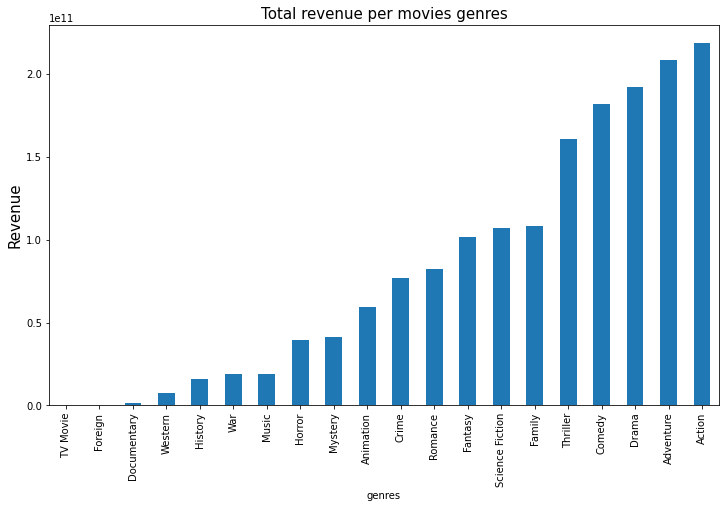

In [15]:
# Total revenue per movies genres

plt.figure(figsize = (12,7))
clean_movies_df.groupby('genres')['revenue_adj'].sum().sort_values(ascending = True).plot(kind = 'bar')
plt.title('Total revenue per movies genres', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

#### Which Movies Genre Generates the Highest and the Lowest Revenue respectively ?
        * Action generates the highest total revuenue 
        * Adventure and Drama movies came secord and third respectively 
        * TV Movie generated the least revenue

###  Research question 2: Does the movies runtime correspond to the budget?

<AxesSubplot:title={'center':'Average Runtime per Movies Genres'}, xlabel='genres', ylabel='Runtime'>

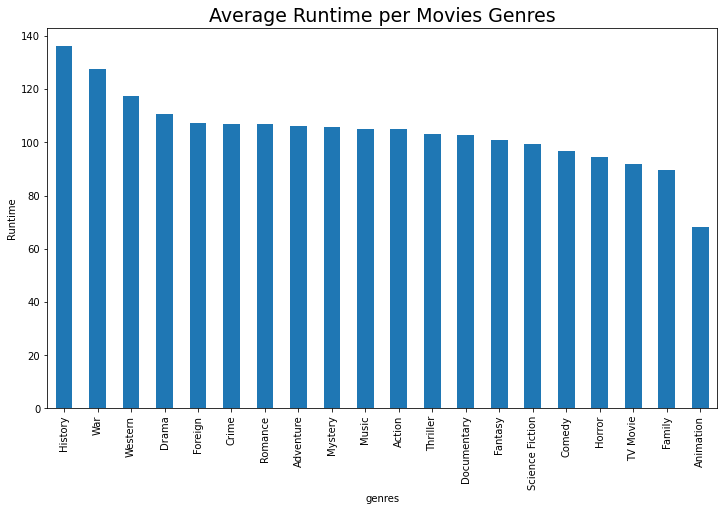

In [16]:
order_1 = clean_movies_df.groupby('genres').runtime.mean().sort_values(ascending = False).index

def plot_bud_run_chart(x, y):
    """The function is to plot the bar chart of the movies genres average runtime and the average budget"""
    plt.figure(figsize = (12,7))
    chart = clean_movies_df.groupby('genres')[x].mean().sort_values(ascending = False)[order_1].plot(kind = 'bar');
    plt.title('Average {} per Movies Genres'.format(y.capitalize()), fontsize = 19);
    plt.ylabel(y.capitalize(), fontsize = 10)
    return chart

# average movies genres runtime plot

plot_bud_run_chart('runtime', 'runtime')

#### Summary of the plot

* History has the longest runtime
* War genres and Western come second and third respectively
* Animation movies genres has the shortest runtime
* Family movies genres is the second to the shortest movies genres 

<AxesSubplot:title={'center':'Average Budget per Movies Genres'}, xlabel='genres', ylabel='Budget'>

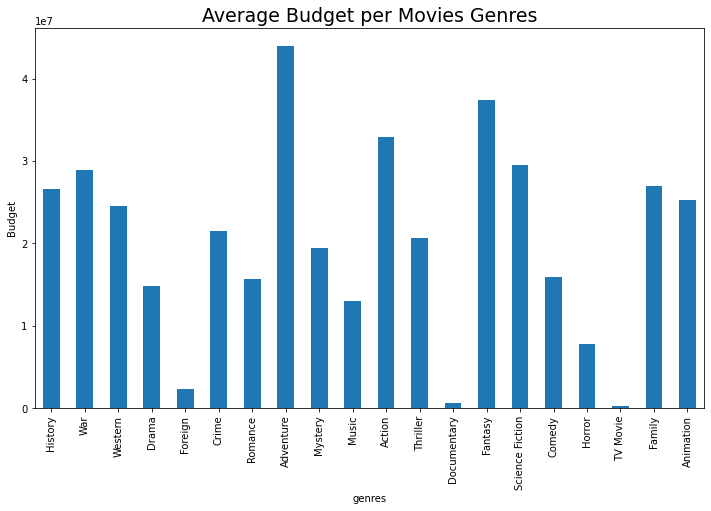

In [17]:
# average movies genres budget plot
plot_bud_run_chart('budget_adj', 'budget')

#### Does the movies runtime correspond the budget?
    * History has the longest runtime but does not proportionately has the highest budget
    * Adventure that has the 8th longest runtime but has the highest budget

### Research question 3: Does the popularity directly imply revenue produced?

Text(0, 0.5, 'Popularity')

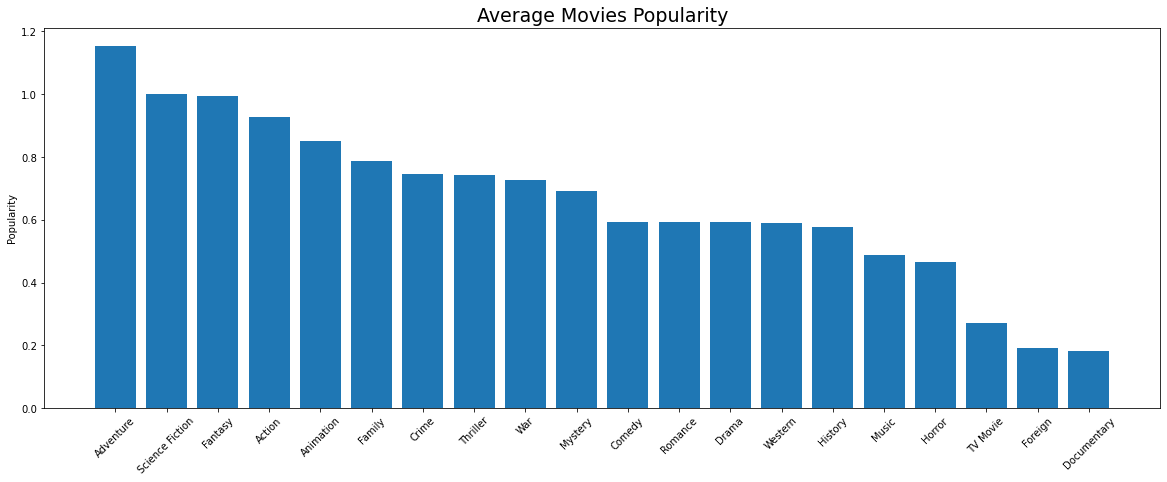

In [18]:
order_2 = clean_movies_df.groupby('genres').popularity.mean().sort_values(ascending = False).index
movies_popularity = clean_movies_df.groupby('genres').popularity.mean().sort_values(ascending = False)

#Plot for movies genres popularity
plt.figure(figsize = (20, 7))
plt.bar(x = movies_popularity.index, height= movies_popularity);
plt.xticks(rotation = 45);
plt.title('Average Movies Popularity', fontsize = 19)
plt.ylabel('Popularity', fontsize = 10)

#### Summary of the plot

* Adventure, Science Fiction and Fantasy are the first three most popular movies genres respectively
* While TV Movies, Foreign and Documentary are the last three respectively 

Text(0, 0.5, 'Revenue')

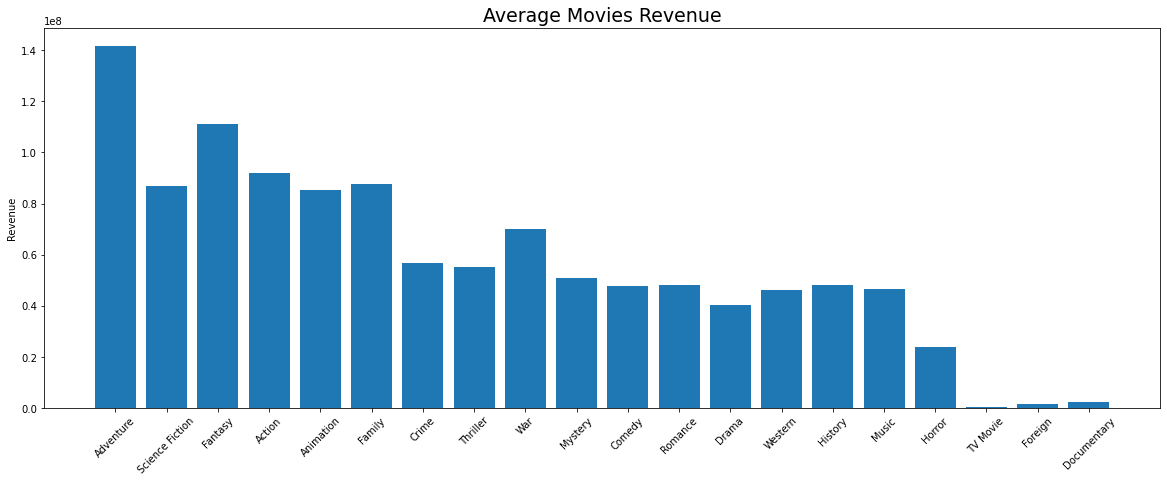

In [19]:
#Plot for movies genres revenue

movies_revenue = clean_movies_df.groupby('genres')['revenue_adj'].mean()[order_2]
plt.figure(figsize = (20, 7))
plt.bar(x = movies_revenue.index, height= movies_revenue);
plt.xticks(rotation = 45);
plt.title('Average Movies Revenue', fontsize = 19)
plt.ylabel('Revenue', fontsize = 10)

#### Does the popularity directly imply revenue produced?
        * Though Adventure has the highest average popularity and also generated the highest average revenue 
        * Science fiction is more popular than fantasy but generated a lower revenue
        * War movies generated more revenue than Crime and Thriller movies which are more popular 
        * The least popular movies- Documentary- is more lucrative than Foreign and TV movie which are more popular
        
        

### Research question 4: For Generes above average of budget and revenue, does budget determines the revenue ?

<AxesSubplot:title={'center':'Top Budget Movies above average'}, xlabel='genres', ylabel='Budget'>

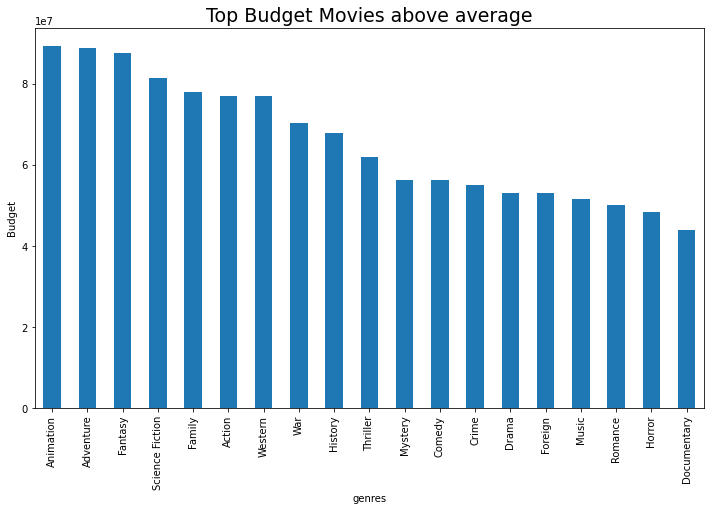

In [20]:
# Generes above average of budget and revenue
order_3 = clean_movies_df.query('budget_adj > budget_adj.mean()').groupby('genres')['budget_adj'].mean().sort_values(ascending =False).index


def plot_bud_rev_chart(x, y):
    """The function to plot the bar chart of movies genres with budget and
    revenue values above the mean"""
    high_movies = clean_movies_df[clean_movies_df[x] > clean_movies_df[x].mean()]
    high_movies_sorted = high_movies.groupby('genres')[x].mean().sort_values(ascending =False)
    plt.title('Top {} Movies above average'.format(y.capitalize()), fontsize = 19);
    plt.ylabel(y.capitalize(), fontsize = 10);
    plt.xticks(rotation = 45);
    return high_movies_sorted[order_3].plot(kind = 'bar', figsize = (12,7));

# top movies budget plot
plot_bud_rev_chart('budget_adj', 'budget')

##### Summary of the plot
    * Animation has the highest budget followed by Adventure and then Fantasy.
    * Similarly, Documentary has the least budget

<AxesSubplot:title={'center':'Top Revenue Movies above average'}, xlabel='genres', ylabel='Revenue'>

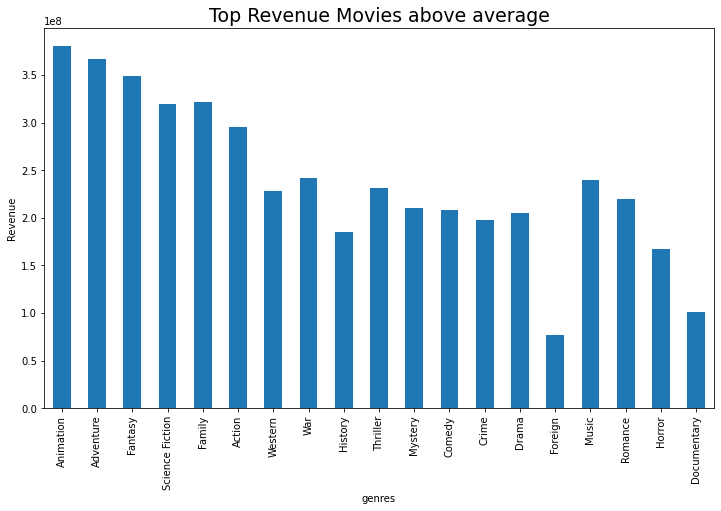

In [21]:
# Top movies revenue plot
plot_bud_rev_chart('revenue_adj', 'revenue')

#### For Generes above average of budget and revenue, does budget determines the revenue ?
        * Thought the most expensive genres - Animation- yielded the most revenue
        * War movies generate more revnue than History that cost more to produce 
        * Also, Foreign genres generate significant too low revenue compare to Music, Romance and Horror that cost less

### Research question 5: Does high budject genres implies high revenue?

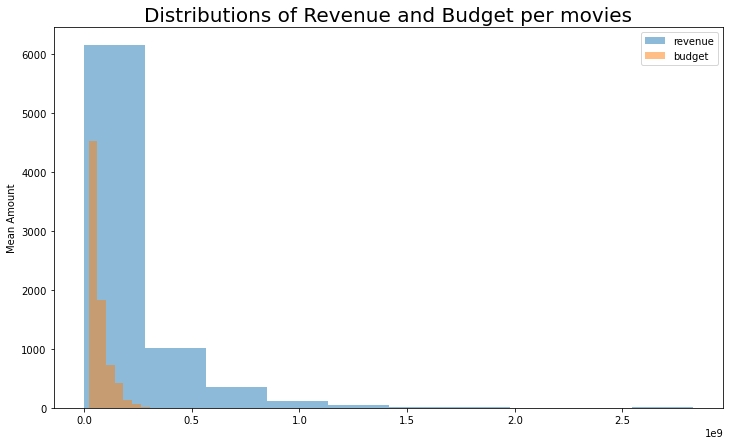

In [22]:
high_budget_genres = clean_movies_df.query('budget_adj > budget_adj.mean()')
high_revenue_genres = clean_movies_df.query('revenue_adj > revenue_adj.mean()')

"""plot histogram that compares the distribution of movies genres budget and revenue 
        above average budget and revenue respectively"""

fig, ax = plt.subplots(figsize =(12,7))
ax.hist(high_budget_genres['revenue_adj'], alpha=0.5, label='revenue')
ax.hist(high_budget_genres['budget_adj'], alpha=0.5, label='budget')
ax.set_title('Distributions of Revenue and Budget per movies', fontsize = 20)
ax.set_ylabel('Mean Amount')
ax.legend(loc='upper right')
plt.show();

#### Does high budject genres implies high revenue
        * Both the budget and revenue are right skewed. It implies, the more the budget, the more the revenue
        * Averagely, the movies yield more money than the cost
        

### Research question 6: Which genre is the most produced?

Text(0, 0.5, 'Runtime')

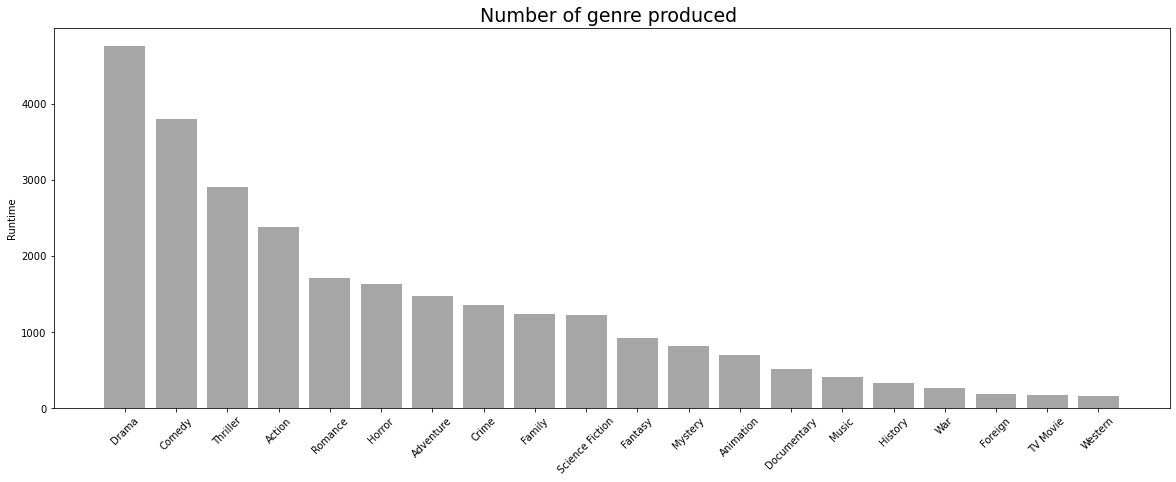

In [23]:
each_genre = clean_movies_df.genres.value_counts()

plt.figure(figsize = (20, 7))
plt.bar(x = each_genre.index, height= each_genre, color = 'grey', alpha = .7)
plt.xticks(rotation = 45);
plt.title('Number of genre produced ', fontsize = 19)
plt.ylabel('Runtime', fontsize = 10)

#### Which genre is the most produced?
        * Drama has the highest number of production 
        * Followed by Comedy, Thriller and Action respectively
        * Foreign, TV Movie and Western has the lowest production number respectively

<a id='conclusions'></a>
## Conclusions



> I performed descriptive analysis on the dataset and answered questions like 
   * Which Movies Genres generates the highest and the lowest revenue respectively? Highest revenue is from **Action** while lowest is from **TV Movies**
   * Does the movies runtime correspond to the budget? **Movies runtime does not correspond to budget**
   * Does the popularity directly imply revenue produced? **Populrity does not necessarily mean high revenue**
   * For Generes above average of budget and revenue, does budget determines the revenue ? **No it does not**
   * Does high budject genres imply high revenue? **Budegt and revenue has similar distribution**
   * Which genre is the most produced? Most produced genre is **Drama**

### Limitation

* During the analysis, I was able to relate different features in the dataset such as revenue and budget, runtime and budget, popularity and genres etc, but I can't say affirmatively that one feature can be used to predict the other because the correlation relationship is not determine. 
* About 50% of the data has zero values for both revenue_adj and budget_adj. The zero values were omitted during the plot of histogram distribution that compares budget_adj and revenue_adj. So, the chart is not the representation of the whole dataset
* Production_companies can be insightful in determining the popularity and success of movies but I have to drop the column due to the large number of missing values